In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import  matplotlib.pyplot as plt

#### Initial EDA

In [2]:
df_car=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
#Since the dataset was created in the 2020-10, the used_year will be 2021 - year bought
df_car['Year_used']=2021-df_car.year

In [4]:
#missing value check
df_car.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Year_used        0
dtype: int64

In [5]:
#fuel, owning is categroy value. However some level of categroy have few record.
df_car.fuel.value_counts()
df_car['new_fuel']=df_car.fuel
df_car['new_owner']=df_car.owner


In [6]:
df_car.fuel.value_counts()
#change (CNG,LPG,Electric to other)

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [7]:
fuel2other=list(df_car.fuel.value_counts()[-3:].index)
df_car.new_fuel.replace(fuel2other,'other',inplace=True)

In [8]:
df_car.new_fuel.value_counts()

Diesel    2153
Petrol    2123
other       64
Name: new_fuel, dtype: int64

In [9]:
df_car.owner.value_counts()
# change Third, Fourth and Test to other

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [10]:
owner2other=list(df_car.owner.value_counts()[-3:].index)
df_car.new_owner.replace(owner2other,'other',inplace=True)

In [11]:
df_car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Year_used,new_fuel,new_owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,14,Petrol,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,14,Petrol,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,9,Diesel,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4,Petrol,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7,Diesel,Second Owner
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,7,Diesel,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,7,Diesel,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,12,Petrol,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,5,Diesel,First Owner


In [12]:
data=df_car[['selling_price','km_driven','transmission','seller_type','new_owner','new_fuel','Year_used']]

In [13]:
data.columns=['selling_price','km_driven','transmission','seller_type','owner','fuel','year_used']
data.columns

Index(['selling_price', 'km_driven', 'transmission', 'seller_type', 'owner',
       'fuel', 'year_used'],
      dtype='object')

Categroy: fuel, owner, transmission, seller_type
Numeric: year_used, km_drivier  
Y: selling_price  

In [14]:
data.head()

,selling_price,km_driven,transmission,seller_type,owner,fuel,year_used
0,60000,70000,Manual,Individual,First Owner,Petrol,14
1,135000,50000,Manual,Individual,First Owner,Petrol,14
2,600000,100000,Manual,Individual,First Owner,Diesel,9
3,250000,46000,Manual,Individual,First Owner,Petrol,4
4,450000,141000,Manual,Individual,Second Owner,Diesel,7


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  4340 non-null   int64 
 1   km_driven      4340 non-null   int64 
 2   transmission   4340 non-null   object
 3   seller_type    4340 non-null   object
 4   owner          4340 non-null   object
 5   fuel           4340 non-null   object
 6   year_used      4340 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [16]:
data.describe()

,selling_price,km_driven,year_used
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,7.909217
std,5.785487e+05,46644.102194,4.215344
min,2.000000e+04,1.000000,1.000000
25%,2.087498e+05,35000.000000,5.000000
50%,3.500000e+05,60000.000000,7.000000
75%,6.000000e+05,90000.000000,10.000000
max,8.900000e+06,806599.000000,29.000000


In [17]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price ~ km_driven + transmission + seller_type + owner + fuel + year_used', data=data, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                         features
0   14.369745                        Intercept
1    1.067157           transmission[T.Manual]
2    1.199645        seller_type[T.Individual]
3    1.081988  seller_type[T.Trustmark Dealer]
4    1.250392            owner[T.Second Owner]
5    1.227482                   owner[T.other]
6    1.208988                   fuel[T.Petrol]
7    1.020325                    fuel[T.other]
8    1.466386                        km_driven
9    1.522386                        year_used


<AxesSubplot:>

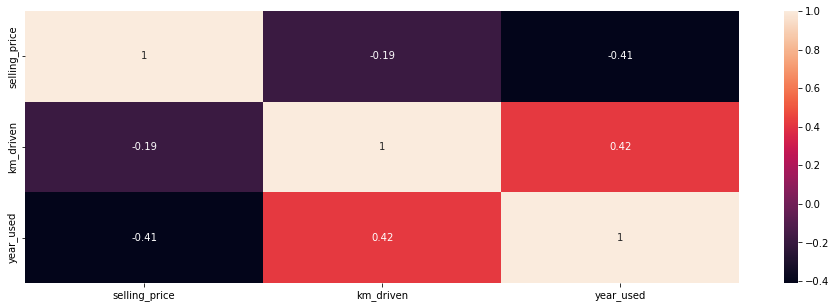

In [18]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

### Extra: Feature Importance

In [19]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# define dataset
y = data['selling_price']
X = data[['km_driven','transmission','seller_type','owner','fuel','year_used']]

X, y = make_regression(n_samples=4340, n_features=6, n_informative=6, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_


In [20]:
x_label=['km_driven','transmission','seller_type','owner','fuel','year_used']


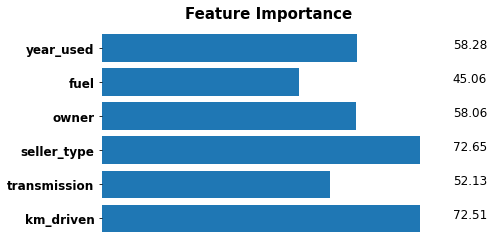

In [21]:
fig,ax=plt.subplots()
ax.barh([0,1,2,3,4,5], importance)


for i in range(6):
    ax.annotate('%.2f' % importance[i], (80,i),annotation_clip=False,size=12)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(x_label,size=12,weight='bold')

ax.set_title('Feature Importance',weight='bold',size=15)

ax.tick_params(axis='x', bottom=False, labelbottom=False)

In [22]:
#Since VIF didn't show the multillinearity the Km_driven and Year_used will be kept in model. And corrolation between
#these two will be reported.
model =smf.ols('selling_price ~ km_driven + transmission + seller_type + owner + fuel + year_used',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     407.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:28:24   Log-Likelihood:                -62411.
No. Observations:                4340   AIC:                         1.248e+05
Df Residuals:                    4330   BIC:                         1.249e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.835e+06   2.45e+04     74.813      0.000    1.79e+06    1.88e+06
transmission[T.Manual]          -8.667e+05    2.2e+04    -39.457      0.000    -9.1e+05   -8.24e+05
seller_type[T.Individual]       -6.995e+04   1.63e+04     -4.289      0.000   -1.02e+05    -3.8e+04
seller_type[T.Trustmark Dealer]  1.642e+05   4.44e+04      3.696      0.000    7.71e+04    2.51e+05
owner[T.Second Owner]           -3.881e+04   1.66e+04     -2.338      0.019   -7.14e+04   -6262.069
owner[T.other]                  -1.965e+04   2.47e+04     -0.795      0.427   -6.81e+04    2.88e+04
fuel[T.Petrol]                  -2.901e+05   1.42e+04    -20.390      0.000   -3.18e+05   -2.62e+05
fuel[T.other]                   -2.783e+05   5.42e+04     -5.133      0.000   -3.85e+05   -1.72e+05
km_driven                          -0.9774      0.168     -5.819      0.000      -1.307      -0.648
year_used                       -3.571e+04   1893.797    -18.855      0.000   -3.94e+04    -3.2e+04
==============================================================================
Omnibus:                     4368.779   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502605.375
Skew:                           4.659   Prob(JB):                         0.00
Kurtosis:                      54.890   Cond. No.                     6.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Selection

##### 1. check influential points

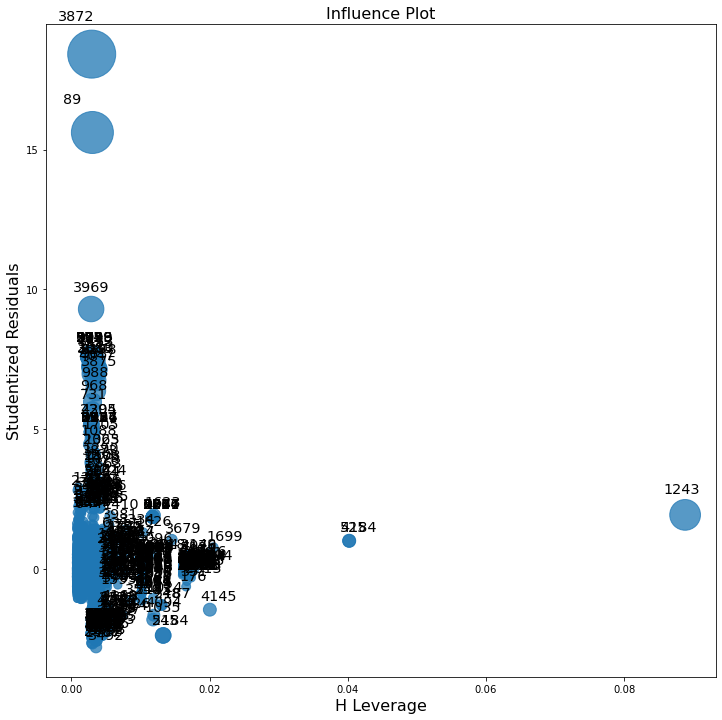

In [23]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 

In [24]:
#threshold externally studentized residuals
import scipy
infl = model.get_influence()
n=4340
p=10
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
print(data.index[atyp_stud],reg_studs[atyp_stud])

Int64Index([  37,   40,   89,   96,  100,  101,  102,  105,  163,  188,
            ...
            3883, 3969, 4033, 4047, 4186, 4224, 4294, 4297, 4304, 4313],
           dtype='int64', length=184) [-2.0260402   2.05117454 15.61153164  3.05523074 -1.98451375  7.26265989
  2.68312633  2.43050061  3.63969632 -2.03981181 -2.00183219  3.09843154
  2.70079144 -2.45260458 -2.35216598 -2.17239855  2.74723695  2.06385546
  2.18882647  7.14389827 -2.37005644  4.90614718  7.60670918 -2.04848852
  4.90614718  7.60670918 -2.04848852  4.90614718  7.60670918 -2.04848852
  4.90614718  7.60670918 -2.04848852  1.99127697 -2.24466703 -1.98418978
  5.68118572 -2.11974487  2.81692561 -2.4552003  -2.27170386 -2.07304926
  2.59139079  2.14702537  4.90614718  7.60670918 -2.04848852  4.90614718
  7.60670918 -2.04848852 -2.50763696 -2.03848409 -2.09629093 -2.29328769
  2.50871088  7.02570562  5.97206226  2.44123401  6.37309198  4.90614718
  7.60670918  3.42924962 -2.04848852  4.12990555  4.46393906  2.3988237

In [25]:
#Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(data.index[atyp_cook],reg_cook[atyp_cook])

Int64Index([  31,   37,   79,   89,   96,  100,  101,  102,  105,  163,
            ...
            4184, 4186, 4224, 4232, 4287, 4294, 4297, 4299, 4304, 4313],
           dtype='int64', length=281) 31      0.000951
37      0.001756
79      0.001040
89      0.070688
96      0.002792
          ...   
4294    0.001092
4297    0.001702
4299    0.001364
4304    0.007730
4313    0.002291
Name: cooks_d, Length: 281, dtype: float64


In [26]:
# obatain dataset without influential point by deleting those data points which were recognized as influential points 
# both by threshold externally studentized residuals method and Cook's distance method 
inf_index = list(set(data.index[atyp_stud]).intersection(data.index[atyp_cook]))
data_woinf = data.drop(labels=inf_index, axis=0)
model_woinf = smf.ols('selling_price ~ km_driven + transmission + seller_type + owner + fuel + year_used',data=data_woinf).fit()

##### 2. check heteroscedasticity

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

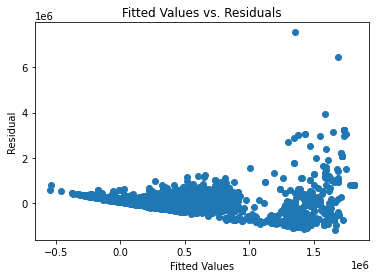

In [27]:
#Fitted Values vs. Residuals Plot with influential points
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [28]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))
# Heteroskedasticity exists

{'LM Statistic': 431.89536969406646, 'LM-Test p-value': 2.1220272773919858e-87}


/var/folders/_z/f10g32xs3nq6ghzxyyw91j040000gn/T/ipykernel_43134/2735813954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log(data['selling_price'])


Text(0.5, 1.0, 'Fitted Values vs. Residuals')

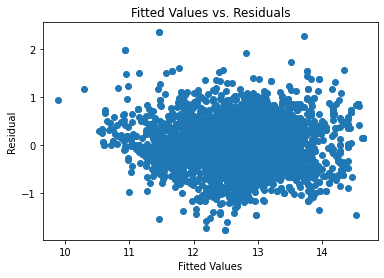

In [29]:
#log transformation on y
data['log_price'] = np.log(data['selling_price'])
model_log = smf.ols('log_price ~ km_driven + transmission + seller_type + owner + fuel + year_used',data=data).fit()
p_log = model_log.fittedvalues
res_log = model_log.resid
plt.scatter(p_log,res_log)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [30]:
#Breusch-Pagan after transfering y
bp_test_log = het_breuschpagan(model_log.resid, model_log.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test_log)))
# Heteroskedasticity exists

{'LM Statistic': 256.59732968168, 'LM-Test p-value': 4.033176530762076e-50}


Text(0.5, 1.0, 'Fitted Values vs. Residuals')

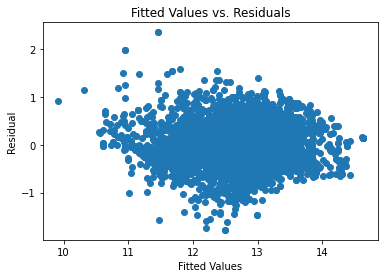

In [31]:
#deleting the influential points
data_woinf['log_price'] = np.log(data_woinf['selling_price'])
model_woinf_log = smf.ols('log_price ~ km_driven + transmission + seller_type + owner + fuel + year_used',data=data_woinf).fit()
p_woinf_log = model_woinf_log.fittedvalues
res_woinf_log = model_woinf_log.resid
plt.scatter(p_woinf_log,res_woinf_log)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [32]:
bp_test_woinf_log = het_breuschpagan(model_woinf_log.resid, model_woinf_log.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test_woinf_log)))
# Heteroskedasticity exists

{'LM Statistic': 132.74890670864497, 'LM-Test p-value': 3.2244447299703192e-24}


Although heteroskedasticity still exists after the log-transformation of y, it imporves a lot after the transformation according to the residual plot.

##### 3. normality

/Users/mlli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


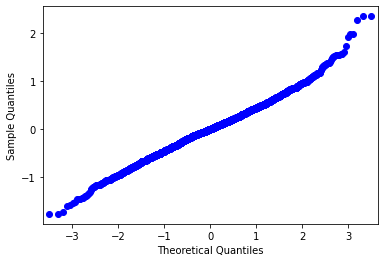

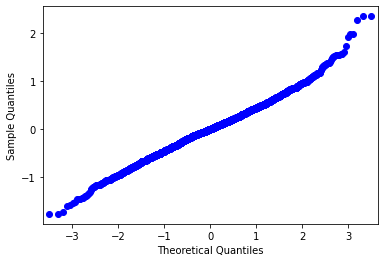

In [33]:
#with influential points --QQ plot
sm.qqplot(model_log.resid)

In [34]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1050.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:28:38   Log-Likelihood:                -2885.7
No. Observations:                4340   AIC:                             5791.
Df Residuals:                    4330   BIC:                             5855.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          14.8013      0.027    546.120      0.000      14.748      14.854
transmission[T.Manual]             -0.8001      0.024    -32.958      0.000      -0.848      -0.752
seller_type[T.Individual]          -0.1634      0.018     -9.064      0.000      -0.199      -0.128
seller_type[T.Trustmark Dealer]     0.3024      0.049      6.161      0.000       0.206       0.399
owner[T.Second Owner]              -0.0417      0.018     -2.273      0.023      -0.078      -0.006
owner[T.other]                     -0.1030      0.027     -3.769      0.000      -0.157      -0.049
fuel[T.Petrol]                     -0.5103      0.016    -32.448      0.000      -0.541      -0.479
fuel[T.other]                      -0.6007      0.060    -10.025      0.000      -0.718      -0.483
km_driven                       -4.175e-07   1.86e-07     -2.249      0.025   -7.81e-07   -5.35e-08
year_used                          -0.1136      0.002    -54.269      0.000      -0.118      -0.109
==============================================================================
Omnibus:                       79.515   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.268
Skew:                           0.109   Prob(JB):                     1.05e-32
Kurtosis:                       3.876   Cond. No.                     6.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  17.,   90.,  417., 1111., 1624.,  808.,  222.,   37.,    9.,
           5.]),
 array([-1.77345169, -1.36044612, -0.94744054, -0.53443497, -0.1214294 ,
         0.29157618,  0.70458175,  1.11758732,  1.53059289,  1.94359847,
         2.35660404]),
 <BarContainer object of 10 artists>)

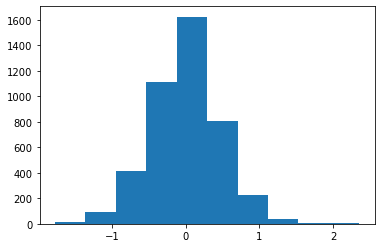

In [35]:
plt.hist(model_log.resid)

/Users/mlli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


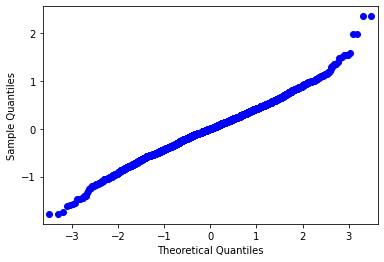

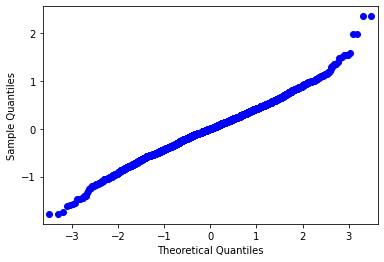

In [36]:
#without influential points -QQ plot
sm.qqplot(model_woinf_log.resid)

In [37]:
model_woinf_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     999.4
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:28:38   Log-Likelihood:                -2533.3
No. Observations:                4173   AIC:                             5087.
Df Residuals:                    4163   BIC:                             5150.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          14.7714      0.031    475.513      0.000      14.711      14.832
transmission[T.Manual]             -0.7912      0.028    -28.514      0.000      -0.846      -0.737
seller_type[T.Individual]          -0.1701      0.018     -9.701      0.000      -0.204      -0.136
seller_type[T.Trustmark Dealer]     0.3210      0.047      6.828      0.000       0.229       0.413
owner[T.Second Owner]              -0.0455      0.018     -2.596      0.009      -0.080      -0.011
owner[T.other]                     -0.1006      0.026     -3.885      0.000      -0.151      -0.050
fuel[T.Petrol]                     -0.4743      0.015    -31.300      0.000      -0.504      -0.445
fuel[T.other]                      -0.5809      0.057    -10.268      0.000      -0.692      -0.470
km_driven                       -3.313e-07   1.77e-07     -1.875      0.061   -6.78e-07    1.52e-08
year_used                          -0.1134      0.002    -56.880      0.000      -0.117      -0.109
==============================================================================
Omnibus:                       73.138   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.228
Skew:                           0.024   Prob(JB):                     1.77e-32
Kurtosis:                       3.916   Cond. No.                     6.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  15.,   67.,  359., 1079., 1634.,  794.,  195.,   22.,    4.,
           4.]),
 array([-1.77991801, -1.3665642 , -0.95321038, -0.53985657, -0.12650275,
         0.28685107,  0.70020488,  1.1135587 ,  1.52691251,  1.94026633,
         2.35362015]),
 <BarContainer object of 10 artists>)

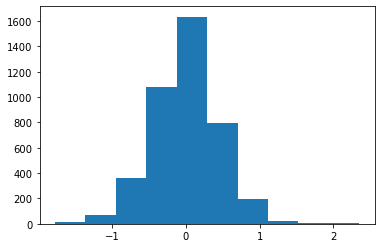

In [38]:
plt.hist(model_woinf_log.resid)

Normality Assumption is violated both with and without the influential point. However, from the histogram, we can see that the distribution of the residuals is very similar to normal distribution.

#### Feature Selection

In [39]:
#with influential points
sm.stats.anova_lm(model_log, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
transmission,1.0,522.595847,522.595847,2355.598272,0.000000e+00
seller_type,2.0,143.762823,71.881411,324.005117,7.421998e-132
owner,2.0,231.983966,115.991983,522.833307,4.076690e-204
fuel,2.0,406.302721,203.151360,915.703783,0.000000e+00
km_driven,1.0,137.596840,137.596840,620.217098,4.664632e-128
year_used,1.0,653.381102,653.381102,2945.112186,0.000000e+00
Residual,4330.0,960.622209,0.221853,NaN,NaN


In [40]:
#without influential points
sm.stats.anova_lm(model_woinf_log, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
transmission,1.0,284.888233,284.888233,1441.508062,3.984851e-271
seller_type,2.0,151.063999,75.531999,382.184919,4.130354e-153
owner,2.0,220.937858,110.468929,558.962547,9.409443e-216
fuel,2.0,355.722763,177.861382,899.962112,0.000000e+00
km_driven,1.0,125.569073,125.569073,635.367875,1.345251e-130
year_used,1.0,639.404716,639.404716,3235.328619,0.000000e+00
Residual,4163.0,822.742338,0.197632,NaN,NaN


<AxesSubplot:ylabel='fuel'>

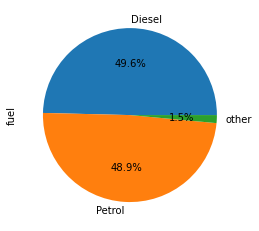

In [41]:
data['fuel'].value_counts().plot.pie(autopct="%.1f%%")

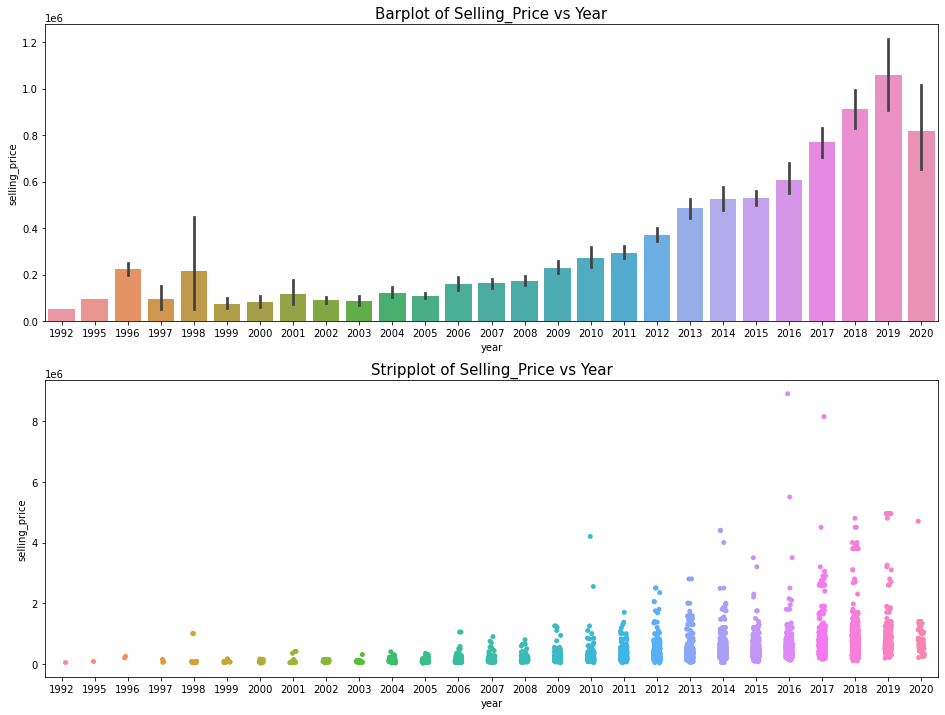

In [42]:
f, ax = plt.subplots(2, 1, figsize=(16, 12) )

sns.barplot(x = 'year', y = 'selling_price', data = df_car, ax = ax[0])
ax[0].set_title("Barplot of Selling_Price vs Year", fontsize=15)

sns.stripplot(x='year', y="selling_price", data=df_car, ax = ax[1])
ax[1].set_title("Stripplot of Selling_Price vs Year", fontsize=15)

plt.show()

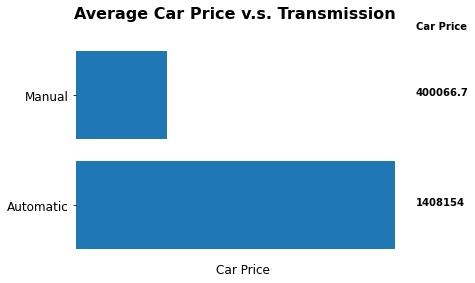

In [43]:
data1=data.drop(data.index[atyp_stud],axis=0).copy()
import matplotlib.patches as patches
fig,ax=plt.subplots()


ax.barh([0,1],data.groupby('transmission').mean()['selling_price']/1000)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



ax.set_xlabel('Car Price',size=12)
ax.set_yticks([0,1])
ax.set_yticklabels(['Automatic','Manual'],size=12)
ax.tick_params(axis='x', bottom=False, labelbottom=False)


ax.annotate("Average Car Price v.s. Transmission", (-10, 1.7), size=16, color='black', weight='bold',annotation_clip=False)

ax.annotate('Car Price',(1500, 1.6), size=10, color='black',weight='bold' ,annotation_clip=False)
ax.annotate("1408154", (1500, 0), size=10, color='black' ,weight='bold',annotation_clip=False)
ax.annotate('400066.7', (1500, 1), size=10, color='black',weight='bold' ,annotation_clip=False)


plt.show()